In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [2]:
sns.set_style('darkgrid')
sns.set(font_scale = 1.2)

In [3]:
data = pd.read_csv('marketing_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


ID： Customer's unique identifier

Year_Birth： Customer's birth year

Education： Customer's education level

Marital_Status： Customer's marital status

Income： Customer's yearly household income

Kidhome： Number of children in customer's household

Teenhome： Number of teenagers in customer's household

Dt_Customer： Date of customer's enrollment with the company

Recency： Number of days since customer's last purchase

MntWines： Amount spent on wine in the last 2 years

MntFruits： Amount spent on fruits in the last 2 years

MntMeatProducts： Amount spent on meat in the last 2 years

MntFishProducts： Amount spent on fish in the last 2 years

MntSweetProducts： Amount spent on sweets in the last 2 years

MntGoldProds： Amount spent on gold in the last 2 years

NumDealsPurchases： Number of purchases made with a discount

NumWebPurchases： Number of purchases made through the company's web site

NumCatalogPurchases： Number of purchases made using a catalogue

NumStorePurchases： Number of purchases made directly in stores

NumWebVisitsMonth： Number of visits to company's web site in the last month

AcceptedCmp3： 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4： 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5： 1 if customer accepted the offer in the 5th campaign, 0 otherwise

AcceptedCmp1： 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2： 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

Response： 1 if customer accepted the offer in the last campaign, 0 otherwise

Complain： 1 if customer complained in the last 2 years, 0 otherwise

Country： Customer's location


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

### Cleaning Variables

In [5]:
data.rename({' Income ' : 'Income'}, axis = 1, inplace = True)
data['Income'] = data['Income'].str.replace('$', '')
data['Income'] = data['Income'].str.replace(',', '').astype(float)

In [6]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

### Null Values

In [7]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [8]:
data['Income'] = data['Income'].fillna(data['Income'].mean())

### Create more variables

+ At what age customer enrolled in the company

In [9]:
data['Customer_Age_When_Enrolled'] = data['Dt_Customer'].dt.year - data['Year_Birth']

+ Customers enrolled after age 80

In [10]:
data[data['Customer_Age_When_Enrolled'] >= 80]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age_When_Enrolled
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,SA,121
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,SP,114
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,0,1,IND,113


In [11]:
data['Total Spent'] = (data['MntFishProducts'] + data['MntWines'] + data['MntSweetProducts']
                       + data['MntFruits'] + data['MntMeatProducts'] + data['MntGoldProds'] )

In [12]:
data['Total Purchases'] = (data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumStorePurchases'] +
                            data['NumCatalogPurchases'])

#### Reducing columns

+ Merging columns Kids at home and Teenagers at home

In [13]:
data['Kids_Teen_at_home'] = data['Kidhome'] + data['Teenhome']
data = data.drop(['Kidhome', 'Teenhome'], axis = 1)

# Exploratory Data Analysis

#### Birth year

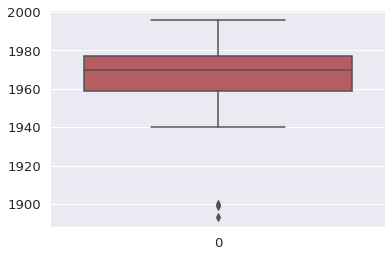

In [14]:
sns.boxplot(data = data['Year_Birth'], color = 'r')

+ Remove outliers 

In [15]:
data = data[data['Year_Birth'] >= 1920]

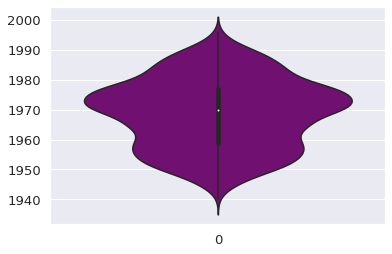

In [ ]:
sns.violinplot(data = data['Year_Birth'], color = 'purple')

### Education

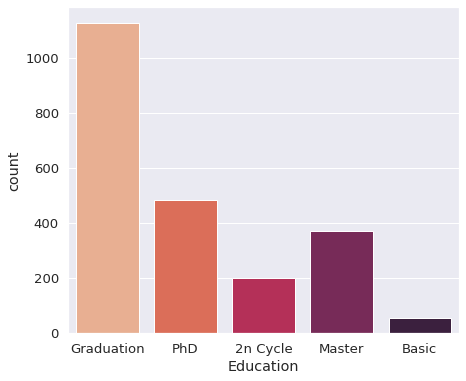

In [16]:
plt.figure(figsize = (7, 6))
sns.countplot(x = data['Education'], palette = 'rocket_r')

### Marital Status

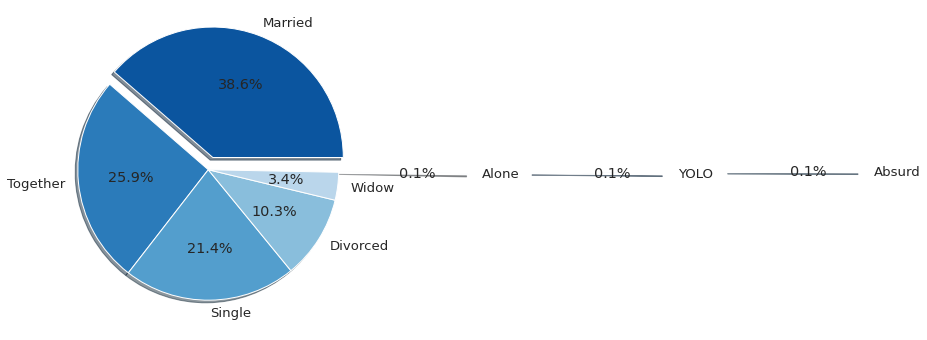

In [17]:
m = data['Marital_Status'].value_counts().to_frame('Count')

sns.set_palette('Blues_r')
plt.figure(figsize = (6, 6))
plt.pie(m['Count'], labels = m.index, explode = (0.1, 0, 0, 0, 0, 1, 2.5, 4), shadow = True, autopct = '%1.1f%%')
plt.show()

### Income 

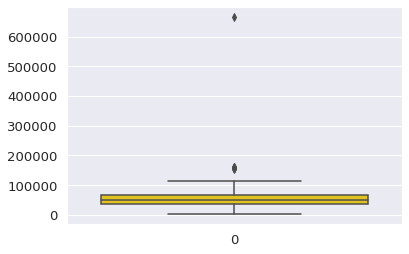

In [18]:
sns.boxplot(data = data['Income'], color = 'gold')

In [19]:
data = data[data['Income'] < 200000]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


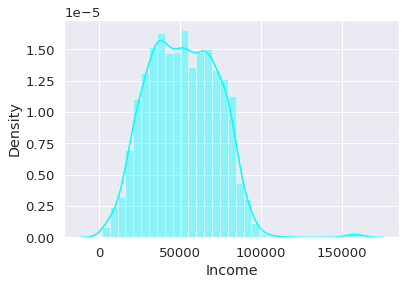

In [20]:
sns.distplot(data['Income'], color = 'aqua')

### Education vs Salary

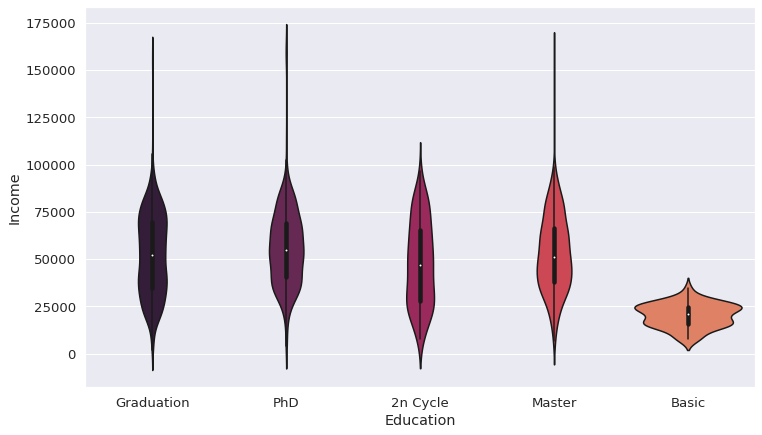

In [21]:
sns.set_palette('rocket')
plt.figure(figsize = (12, 7))
sns.violinplot(y = data['Income'], x = data['Education'])

### Income vs Gold

Text(0.5, 0, 'Amount Spent on Gold')

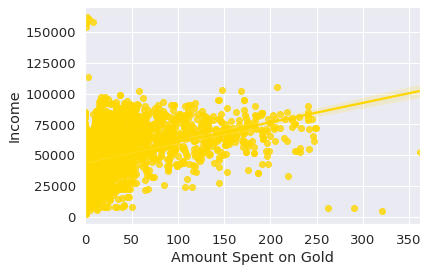

In [22]:
sns.regplot(x = data['MntGoldProds'], y = data['Income'], color = 'gold')
plt.xlabel('Amount Spent on Gold')

### Income vs Total Spent in last two years

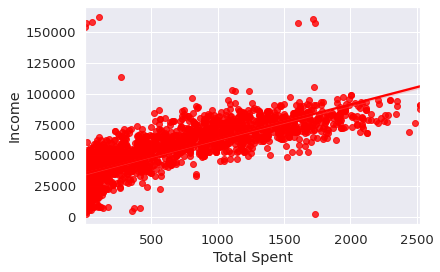

In [23]:
sns.regplot(x = data['Total Spent'], y = data['Income'], color = 'red')

### Recency

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


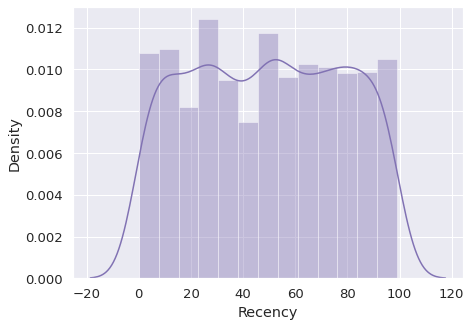

In [24]:
plt.figure(figsize = (7, 5))
sns.distplot(data['Recency'], color = 'm')

### Customer age when enrolled

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Customer Age When Enrolled')

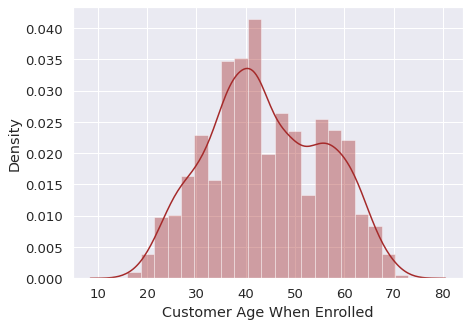

In [25]:
plt.figure(figsize = (7, 5))
sns.distplot(data['Customer_Age_When_Enrolled'], color = 'brown')
plt.xlabel('Customer Age When Enrolled')

### Number of Customers from each Country

Text(0, 0.5, 'No. of Customers')

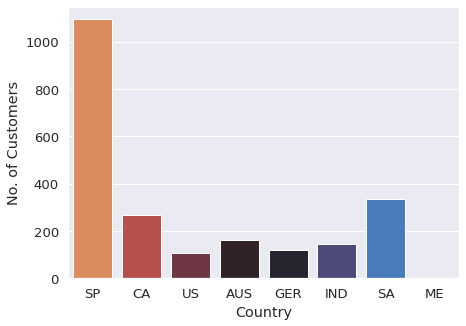

In [26]:
plt.figure(figsize = (7, 5))
sns.countplot(x = data['Country'], palette = 'icefire_r')
plt.ylabel('No. of Customers')

## Which country has more number of purchases made?

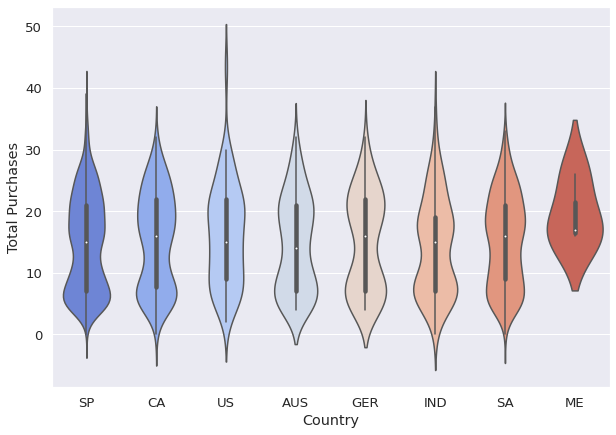

In [27]:
plt.figure(figsize = (10, 7))
sns.violinplot(x = data['Country'], y = data['Total Purchases'], palette = 'coolwarm')

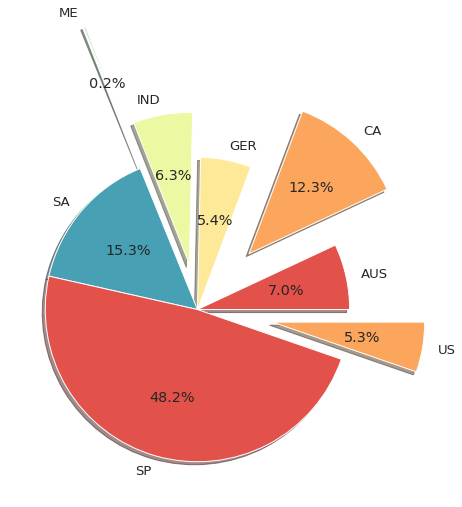

In [28]:
pm = data[['Total Purchases', 'Country']].groupby(['Country']).agg([sum])

sns.set_palette('Spectral')
plt.figure(figsize = (7, 7))
plt.pie(pm['Total Purchases']['sum'], labels = pm.index, explode = (0, 0.5, 0, 0.3, 1, 0, 0, 0.5),
        shadow = True, autopct = '%1.1f%%')
plt.show()

### Number of Enrollments in each month and year

Text(0, 0.5, 'Enrollments')

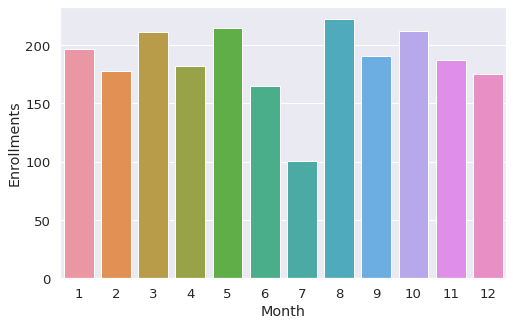

In [29]:
plt.figure(figsize = (8, 5))
sns.countplot(x = data['Dt_Customer'].dt.month)
plt.xlabel('Month')
plt.ylabel('Enrollments')

Text(0, 0.5, 'Enrollments')

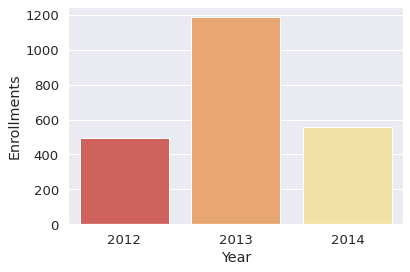

In [30]:
sns.countplot(x = data['Dt_Customer'].dt.year)
plt.xlabel('Year')
plt.ylabel('Enrollments')

## Purchases made through each source

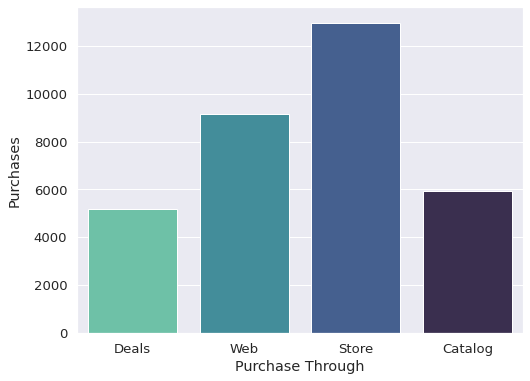

In [31]:
plt.figure(figsize = (8, 6))
tp = data[['NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']].agg([sum])

sns.barplot(x = tp.T.index, y = tp.T['sum'], palette = 'mako_r')
plt.gca().set_xticklabels(['Deals', 'Web', 'Store', 'Catalog'])
plt.xlabel('Purchase Through')
plt.ylabel('Purchases')
plt.show()

## Income vs Purchases

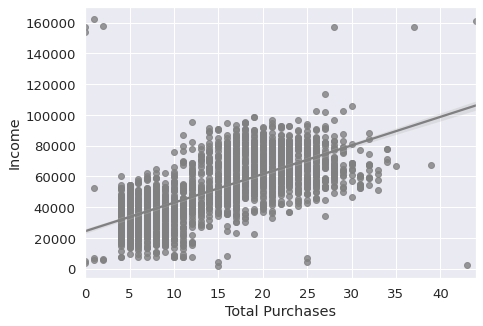

In [32]:
plt.figure(figsize = (7, 5))
sns.regplot(x = data['Total Purchases'], y = data['Income'], color = 'grey')

## Income vs Wine

Text(0.5, 0, 'Spent on Wine')

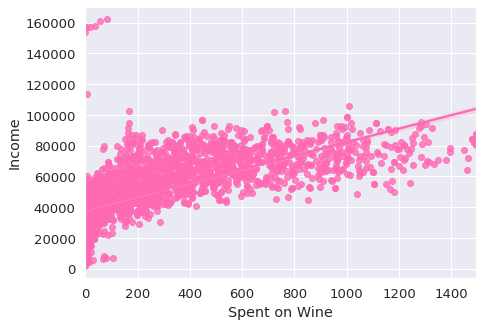

In [33]:
plt.figure(figsize = (7, 5))
sns.regplot(x = data['MntWines'], y = data['Income'], color = 'hotpink')
plt.xlabel('Spent on Wine')

## Amount spent on different Products

Text(0, 0.5, 'Amount')

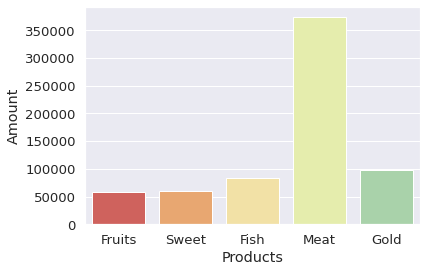

In [34]:
prod = data[['MntFruits', 'MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntGoldProds']].agg([sum]).T

sns.barplot(x = prod.index, y = prod['sum'])
plt.gca().set_xticklabels(['Fruits', 'Sweet', 'Fish', 'Meat', 'Gold'])
plt.xlabel('Products')
plt.ylabel('Amount')